<a href="https://colab.research.google.com/github/chminPark/ml-python/blob/master/%EC%8B%A4%EC%8A%B5_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다항식 문제를 선형회기로 풀어봅니다
![](https://drive.google.com/uc?export=view&id=1X3BKISKrrSOqqAATlwk-n9qzXmXI4-lt)


* 2차 다항식에서 만들어진 데이터 이므로 2차 다항식 문제로 풀어본다
* 4차 다항식 형태로 풀어 본다면?
* Loss 는 MSE와 RMSE를 활용한다. 각 Loss로 했을 때의 문제는?
* Learning Rate를 바꾸어 가면서 실험 해 보세요. 크게 하면?


In [ ]:
# Pytorch로 개발하기 위한 Library
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 그림을 그리기 위한 library
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu118'

In [ ]:
def show_predicted(x, y, preds, ax=None, title=""):
    if ax is None:
      ax=plt.subplots(figsize=(3,3))[1]
    ax.scatter(x,y, label='true')

    if preds is not None:
      ax.scatter(x, preds, label='pred', color='red')
    ax.legend()
    ax.set_title(title)


### Gradient Descent의 개념을 이해한다
* Loss계산 후 Step Loss를 줄이기 위해 학습이 진행됩니다.
* Gradient(기울기)는 Loss의 기울기 입니다

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/gradient-descent-in-machine-learning1.png" height="200px" width="300px">

<img src="https://miro.medium.com/max/1400/1*zoywHDM6_AdN2LmQbro9Iw.webp" height="150px" width="350px">


* Learning의 크기는 학습속도에 영향을 미칩니다. 너무 크면 학습이 안될 수도 있습니다

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/gradient-descent-in-machine-learning3.png" height="200px" width="500px">






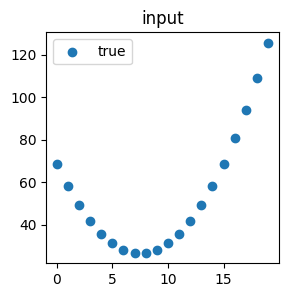

In [ ]:
# 데이터 생성
x_train = torch.arange(0,20).float()
y_train = x_train*3 + 0.75*((x_train-9.5)**2)+1

show_predicted(x_train, y_train, None, title="input")

Initial Weights: tensor([-1.9184,  0.3951, -1.8359], requires_grad=True)
Initial Cost: 140740.21875
Epoch    1/10000 a: -1.229, b: 0.440, c: -1.833, Cost: 97298.171875
Epoch 1001/10000 a: 0.295, b: 0.657, c: -1.745, Cost: 717.996094
Epoch 2001/10000 a: 0.288, b: 0.770, c: -1.664, Cost: 711.572754
Epoch 3001/10000 a: 0.280, b: 0.877, c: -1.585, Cost: 705.644714
Epoch 4001/10000 a: 0.274, b: 0.979, c: -1.508, Cost: 700.167114
Epoch 5001/10000 a: 0.267, b: 1.075, c: -1.431, Cost: 695.098572
Epoch 6001/10000 a: 0.261, b: 1.167, c: -1.356, Cost: 690.402222
Epoch 7001/10000 a: 0.255, b: 1.253, c: -1.281, Cost: 686.043884
Epoch 8001/10000 a: 0.249, b: 1.335, c: -1.208, Cost: 681.992798
Epoch 9001/10000 a: 0.244, b: 1.413, c: -1.135, Cost: 678.221130


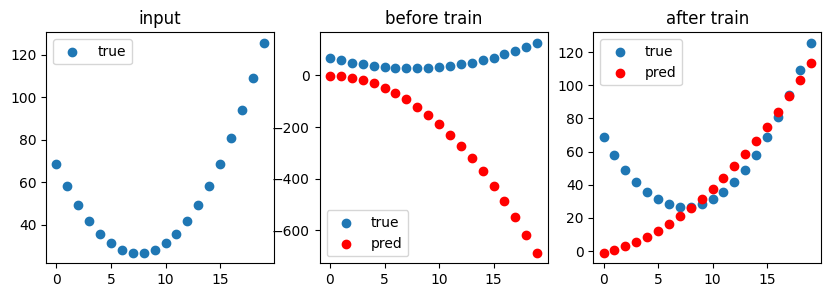

In [ ]:
# 모델 가정 : Quadratic function
def hypothesis(x, coefficients):
    a,b,c = coefficients

    ##### [실습]
    ##### 학습할 모델(=수식) 을 정의한다
    # hypo = a*(x**3)+b*(x**2)+c*x+d
    hypo = a*(x**2)+b*(x)+c
    #####

    return hypo


##### MSE Loss를 구현해 본다.
def mse(preds, targets):

    error = preds-targets

    ##### [실습]
    ###### MSE를 정의한다 ###
    mse = (error**2).mean()

    ######


    return mse


fig, ax = plt.subplots(1,3, figsize=(10,3))
show_predicted(x_train,y_train, None, ax[0], title="input")

# 2차 함수이므로 bias 까지 포함하여 random 값 3개를 학습이 되도록 선언한다
params = torch.randn(3).requires_grad_()
print(f"Initial Weights: {params}")

# 예측값 생성
preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[1], "before train")

# RMSE loss
cost = mse(preds,  y_train)
print(f"Initial Cost: {cost}")


# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)

### Learning Rate를 0.0001, 0.000001, 0.00000001 에 대해 실험해 본다.
optimizer = torch.optim.SGD([params], lr=0.000003)

nb_epochs = 10000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    ##### 예측값을 생성해 본다.
    preds = hypothesis(x_train, params)
    #####

    # cost 계산
    cost = mse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산

    ##### 계산된 gradient 값을 이용하여 W,b 업데이트하는 Step을 구현한다
    optimizer.step()
    #####


    # 로그 출력
    if epoch % (nb_epochs/10) == 1:
        print('Epoch {:4d}/{} a: {:.3f}, b: {:.3f}, c: {:.3f}, Cost: {:.6f}'.format(
            epoch, nb_epochs, params[0].item(), params[1].item(), params[2].item(), cost.item()
        ))

preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[2], "after train")

Initial Weights: tensor([ 0.0408, -0.2918,  0.3959], requires_grad=True)
Initial Cost: 57.72438430786133
Epoch    1/10000 a: 0.041, b: -0.292, c: 0.396, Cost: 57.702065
Epoch 1001/10000 a: 0.179, b: -0.282, c: 0.397, Cost: 38.558952
Epoch 2001/10000 a: 0.275, b: -0.276, c: 0.398, Cost: 28.953371
Epoch 3001/10000 a: 0.320, b: -0.272, c: 0.398, Cost: 26.769325
Epoch 4001/10000 a: 0.337, b: -0.270, c: 0.399, Cost: 26.472187
Epoch 5001/10000 a: 0.342, b: -0.269, c: 0.400, Cost: 26.435595
Epoch 6001/10000 a: 0.344, b: -0.268, c: 0.400, Cost: 26.430351
Epoch 7001/10000 a: 0.345, b: -0.267, c: 0.401, Cost: 26.428814
Epoch 8001/10000 a: 0.345, b: -0.266, c: 0.401, Cost: 26.427704
Epoch 9001/10000 a: 0.345, b: -0.265, c: 0.402, Cost: 26.426655


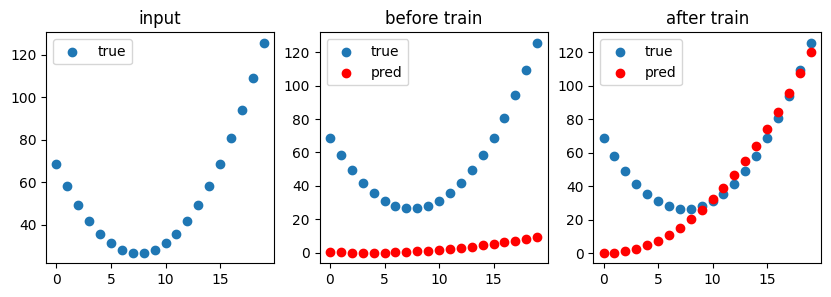

In [ ]:
#MSE로 위의 문제를 풀어 본다

# 데이터 생성
x_train = torch.arange(0,20).float()
y_train = x_train*3 + 0.75*((x_train-9.5)**2)+1


# 모델 가정
# Quadratic function
def hypothesis(x, coefficients):
    a,b,c = coefficients
    hypo = a*(x**2)+(b*x)+c

    return hypo


##### RMSE Loss를 구현해 본다.
def rmse(preds, targets):

    error = preds-targets

    ##### [실습]
    ###### RMSE를 정의한다 ###
    rmse = (error**2).mean().sqrt()
    ######


    return rmse

fig, ax = plt.subplots(1,3, figsize=(10,3))
show_predicted(x_train,y_train, None, ax[0], title="input")

# 2차 함수이므로 bias 까지 포함하여 random 값 3개를 학습이 되도록 선언한다
params = torch.randn(3).requires_grad_()
print(f"Initial Weights: {params}")

# 예측값 생성
preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[1], title="before train")

# rmse loss
cost = rmse(preds,  y_train)
print(f"Initial Cost: {cost}")


# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)

##### [실습]
##### 적절한 Learning Rate를 할당한다.
optimizer = torch.optim.SGD([params], lr=0.000001)
######

nb_epochs = 10000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    ##### 예측값을 생성해 본다.
    preds = hypothesis(x_train, params)
    #####

    # cost 계산
    cost = rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step()


    # 로그 출력
    if epoch % (nb_epochs/10) == 1:
        print('Epoch {:4d}/{} a: {:.3f}, b: {:.3f}, c: {:.3f}, Cost: {:.6f}'.format(
            epoch, nb_epochs, params[0].item(), params[1].item(), params[2].item(), cost.item()
        ))

preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[2], title="after train")

Initial Weights: tensor([-0.5779, -0.7917, -0.8881, -1.0671,  0.2081], requires_grad=True)
Initial Cost: 29771.109375
Epoch    1/10000 a: -0.578, b: -0.791, c: -0.888, Cost: 195674.500000
Epoch 1001/10000 a: -0.683, b: -0.619, c: -0.864, Cost: 191201.875000
Epoch 2001/10000 a: -0.741, b: -0.489, c: -0.845, Cost: 188792.218750
Epoch 3001/10000 a: -0.778, b: -0.385, c: -0.831, Cost: 187319.046875
Epoch 4001/10000 a: -0.803, b: -0.302, c: -0.819, Cost: 186363.375000
Epoch 5001/10000 a: -0.821, b: -0.233, c: -0.809, Cost: 185719.921875
Epoch 6001/10000 a: -0.833, b: -0.176, c: -0.801, Cost: 185275.140625
Epoch 7001/10000 a: -0.843, b: -0.129, c: -0.794, Cost: 184961.296875
Epoch 8001/10000 a: -0.850, b: -0.090, c: -0.789, Cost: 184735.500000
Epoch 9001/10000 a: -0.855, b: -0.057, c: -0.784, Cost: 184568.281250


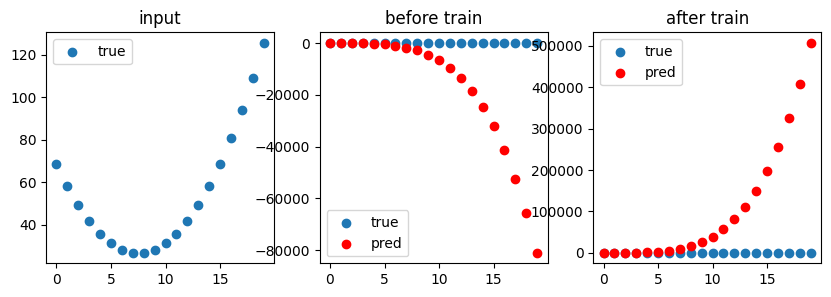

In [ ]:
# 위와 똑같은 문제를 4차 다항식으로 정의 하시요. 결과가 어떤가요?

# 데이터 생성
x_train = torch.arange(0,20).float()
y_train = x_train*3 + 0.75*((x_train-9.5)**2)+1


# 모델 가정
def hypothesis(x, coefficients):
    a,b,c,d,e = coefficients

    ##### [실습]
    ##### 학습할 모델(=수식) 을 정의한다
    hypo = a*(x**4)+b*(x**3)+c*(x**2)+d*(x) + e
    #####

    return hypo


##### RMSE Loss를 구현해 본다.
def rmse(preds, targets):

    error = preds-targets
    ###### RMSE를 정의한다 ###
    rmse = (error**2).mean().sqrt()
    ######

    return rmse

fig, ax = plt.subplots(1,3, figsize=(10,3))
show_predicted(x_train,y_train, None, ax[0], title="input")


##### [실습] 4차 함수
params = torch.randn(5).requires_grad_()
print(f"Initial Weights: {params}")

# 예측값 생성
preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[1], title="before train")

# RMSE loss
cost = rmse(preds,  y_train)
print(f"Initial Cost: {cost}")


##### [실습] Learning Rate을 바꾸어 가면서 실험해 보세요
optimizer = torch.optim.SGD([params], lr=0.0001)

##### [실습] Epoch를 바꾼다면?
nb_epochs = 10000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    ##### 예측값을 생성해 본다.
    preds = hypothesis(x_train, params)
    #####

    # cost 계산
    cost = rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산

    ##### 계산된 gradient 값을 이용하여 W,b 업데이트하는 Step을 구현한다
    optimizer.step()
    #####


    # 로그 출력
    if epoch % (nb_epochs/10) == 1:
        print('Epoch {:4d}/{} a: {:.3f}, b: {:.3f}, c: {:.3f}, Cost: {:.6f}'.format(
            epoch, nb_epochs, params[0].item(), params[1].item(), params[2].item(), cost.item()
        ))

preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[2], title="after train")

Initial Weights: tensor([-1.6411,  0.2443], requires_grad=True)
Initial Cost: 8.57005786895752
Epoch    1/1000 a: -1.598, b: 0.263, Cost: 8.514647
Epoch  101/1000 a: 0.562, b: 1.194, Cost: 2.983095
Epoch  201/1000 a: 1.779, b: 1.502, Cost: 0.191477
Epoch  301/1000 a: 1.919, b: 1.185, Cost: 0.071280
Epoch  401/1000 a: 1.988, b: 0.998, Cost: 0.027144
Epoch  501/1000 a: 1.989, b: 0.995, Cost: 0.027163
Epoch  601/1000 a: 1.989, b: 0.995, Cost: 0.027165
Epoch  701/1000 a: 1.989, b: 0.995, Cost: 0.027165
Epoch  801/1000 a: 1.989, b: 0.995, Cost: 0.027165
Epoch  901/1000 a: 1.989, b: 0.995, Cost: 0.027165


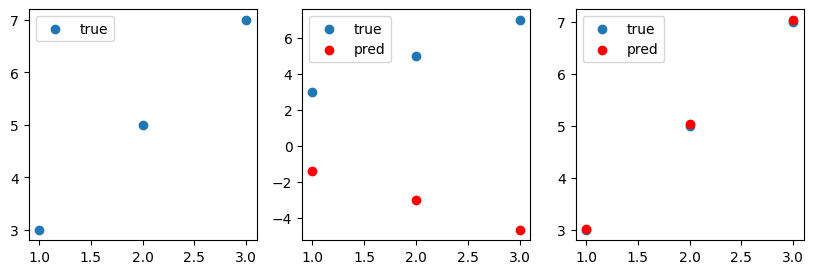

In [ ]:
# y = 2x +1 데이터를 확인한다
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[3], [5], [7]])

# Linear function
def hypothesis(x, coefficients):
    a,b = coefficients
    return a*x + b


##### RMSE Loss를 구현해 본다.
def rmse(preds, targets):
    return ((preds-targets)**2).mean().sqrt()
#####

###### 실습 : Learing Rate 를 바꾸어 가면서 위 데이터에 대한 문제를 풀어 본다.
def show_predicted(x, y, preds, ax=None):
    if ax is None:
      ax=plt.subplots(figsize=(3,3))[1]
    ax.scatter(x,y, label='true')

    if preds is not None:
      ax.scatter(x, preds, label='pred', color='red')
    ax.legend()


fig, ax = plt.subplots(1,3, figsize=(10,3))
show_predicted(x_train,y_train, None, ax[0])

params = torch.randn(2).requires_grad_()
print(f"Initial Weights: {params}")

preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[1])

# RMSE loss
cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")


# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)

### Learning Rate를 0.0001, 0.1, 0.00000001 에 대해 실험해 본다.
optimizer = torch.optim.SGD([params], lr=0.01)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    ##### 예측값을 생성해 본다.
    preds = hypothesis(x_train, params)
    #####

    # cost 계산
    cost = rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산

    ##### 계산된 gradient 값을 이용하여 W,b 업데이트하는 Step을 구현한다
    optimizer.step()
    #####


    # 로그 출력
    if epoch % (nb_epochs/10) == 1:
        print('Epoch {:4d}/{} a: {:.3f}, b: {:.3f}, Cost: {:.6f}'.format(
            epoch, nb_epochs, params[0].item(), params[1].item(), cost.item()
        ))

preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(), ax[2])

## 데이터의 형태를 알아도 잘 학습이 안되는 경우

Initial Weights: tensor([ 0.5220, -0.2898,  1.7818, -0.2098], requires_grad=True)
Initial Cost: 213535.828125
Epoch    1/100000 a: 0.574, b: -0.293, c: 1.782, d: -0.210, Cost: 12563629.000000
Epoch 10001/100000 a: 6.012, b: -2.967, c: 1.703, d: -0.211, Cost: 10629914.000000
Epoch 20001/100000 a: 7.249, b: -4.545, c: 1.658, d: -0.212, Cost: 10194070.000000
Epoch 30001/100000 a: 7.989, b: -5.809, c: 1.622, d: -0.213, Cost: 9934709.000000
Epoch 40001/100000 a: 8.500, b: -6.877, c: 1.592, d: -0.214, Cost: 9756476.000000
Epoch 50001/100000 a: 8.878, b: -7.801, c: 1.566, d: -0.214, Cost: 9625430.000000
Epoch 60001/100000 a: 9.168, b: -8.612, c: 1.544, d: -0.214, Cost: 9525030.000000
Epoch 70001/100000 a: 9.399, b: -9.329, c: 1.525, d: -0.215, Cost: 9445296.000000
Epoch 80001/100000 a: 9.587, b: -9.967, c: 1.508, d: -0.215, Cost: 9381078.000000
Epoch 90001/100000 a: 9.743, b: -10.537, c: 1.493, d: -0.215, Cost: 9327481.000000


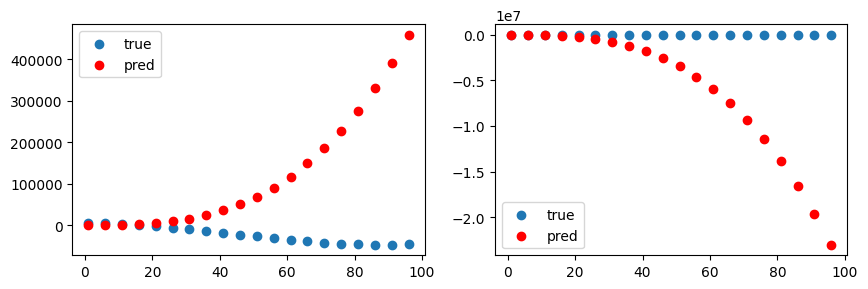

In [ ]:
import torch

from torch import optim
import numpy as np
import matplotlib.pyplot as plt

x_train = torch.arange(1,100,5).float() # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000

def hypothesis(x, coefficients):
    a,b,c,d = coefficients


    return a*(x**3)+b*(x**2)+c*x+d

############################################################
##### 실습 : 3차식 문제를 풀 수 있는 코드를 작성해 보세요
params = torch.randn(4).requires_grad_()
print(f"Initial Weights: {params}")

preds = hypothesis(x_train, params)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD([params], lr=0.0001)

nb_epochs = 100000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = hypothesis(x_train, params)
    # cost 계산
    cost =  rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 로그 출력
    if epoch % (nb_epochs/10) == 1:
        print('Epoch {:4d}/{} a: {:.3f}, b: {:.3f}, c: {:.3f}, d: {:.3f}, Cost: {:.6f}'.format(
            epoch, nb_epochs, params[0].item(), params[1].item(), params[2].item(), params[3].item(), cost.item()
        ))

preds = hypothesis(x_train, params)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])